In [2]:
import pandas as pd
import numpy  as np
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from time import time
from sklearn.metrics import f1_score
%matplotlib inline

In [3]:
# lendo arquivos
bids  = pd.read_csv('bids.csv')   #conjunto de dados de lances
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

In [4]:
# visualiza as 10 primeiras do data set para primeiras análises.
bids.head(10)

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3
5,5,e8291466de91b0eb4e1515143c7f74dexy2yr,3vi4t,mobile,phone7,9759243157894736,ru,91.107.221.27,vasstdc27m7nks3
6,6,eef4c687daf977f64fc1d08675c44444raj3s,kjlzx,mobile,phone2,9759243210526315,th,152.235.155.159,j9nl1xmo6fqhcc6
7,7,ab056855c9ca9d36390feae1fa485883issyg,f5f6k,home goods,phone8,9759243210526315,id,3.210.112.183,hnt6hu93a3z1cpc
8,8,d600dc03b11e7d782e1e4dae091b084a1h5ch,h7jjx,home goods,phone9,9759243210526315,th,103.64.157.225,vasstdc27m7nks3
9,9,a58ace8b671a7531c88814bc86b2a34cf0crb,3zpkj,sporting goods,phone4,9759243210526315,za,123.28.123.226,vasstdc27m7nks3


In [5]:
# visualiza as 10 primeiras do data set para primeiras análises.
train.head(10)

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0
5,7eaefc97fbf6af12e930528151f86eb91bafh,a3d2de7675556553a5f08e4c88d2c228yory1,5a1d8f28bc31aa6d72bef2d8fbf48b967hra3,0.0
6,25558d24bca82beef0f9db4ba1fe2045ynnvq,81580585d4dedd473da11aabf37fe9d4e2s2n,9a6d81115b9b653ba326eb510e9163b47drqj,0.0
7,88ae7a35e374a6fddd079ebb28c822eeohwse,a3d2de7675556553a5f08e4c88d2c2289zref,3a7e6a32b24aeab0688e91a41f3188e22iuec,0.0
8,57db69e32163f3e486dc6ef7d615aa12usje6,bf1c3151cc309308077ad0ccb99779ad12apw,31b95425d178b89fd7306762bb48bfb5n04sj,0.0
9,d1be739798ba0745a1fd72ac918a9f1929hei,f49162ea9903fc00e4721d2f7972df9d6az4s,5b1f6e97a1cc27cd7fa9a3fe17eccd2a6mpdv,0.0


In [6]:
#Analise dataset BIDS
bids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7656334 entries, 0 to 7656333
Data columns (total 9 columns):
bid_id         int64
bidder_id      object
auction        object
merchandise    object
device         object
time           int64
country        object
ip             object
url            object
dtypes: int64(2), object(7)
memory usage: 525.7+ MB


In [7]:
#função para obter % de dados nulos por coluna
def dados_nulos(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Valores Faltantes', 1 : '% do total'})
        return mis_val_table_ren_columns.round(2)


In [8]:
dados_nulos(bids)

,Valores Faltantes,% do total
bid_id,0,0.00
bidder_id,0,0.00
auction,0,0.00
merchandise,0,0.00
device,0,0.00
time,0,0.00
country,8859,0.12
ip,0,0.00
url,0,0.00


In [9]:
dados_nulos(train)

,Valores Faltantes,% do total
bidder_id,0,0.0
payment_account,0,0.0
address,0,0.0
outcome,0,0.0


In [10]:
# analisar os totais agrupados por coluna 
num_columns = len(bids.columns)

for x in range(0, num_columns):
  #print len(set(bids['auction']))
    print "Total da coluna "+bids.columns[x]+" {:,}".format(len(set(bids[bids.columns[x]]))) # set remove duplicados
            

Total da coluna bid_id 7,656,334
Total da coluna bidder_id 6,614
Total da coluna auction 15,051
Total da coluna merchandise 10
Total da coluna device 7,351
Total da coluna time 776,529
Total da coluna country 200
Total da coluna ip 2,303,991
Total da coluna url 1,786,351


Algumas conclusões

Coluna | Total  
:----|:-:
bid_id / Id leilão |7,656,334
bidder_id / licitantes |6,614
auction| 15,051
merchandise | 10
device | 7,351
time | 776,529
country | 200
ip | 2,303,991
url | 1,786,351



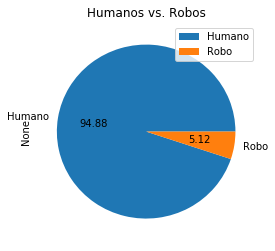

In [11]:
%matplotlib inline
from IPython.display import display
train.groupby('outcome').size().plot(labels=['Humano', 'Robo'], kind='pie', autopct='%.2f', figsize=(4, 4), 
                                        title='Humanos vs. Robos', legend=True)

Aqui começam a surgir algumas hipóteses.
O usuário do leilão que não é humano pode ter mais lances por leilão, mais ips, e devices.

In [12]:
merge_bids = pd.merge(bids, train, how='left', on='bidder_id')
merge_bids.head(2)

merge_bids.dropna(subset=['outcome'], inplace=True)
merge_bids.dropna(subset=['country'], inplace=True)

# colunas dos atributo
feature_cols = list(merge_bids.columns[:-1])

# coluna-alvo, 'outcome'
target_col = merge_bids.columns[-1] 

# lista de colunas
print "Colunas de atributos:\n{}".format(feature_cols)
print "\nColuna-alvo: {}".format(target_col)

# dados em atributos e variáveis-alvo (X_all e y_all, respectivamente)

X_all = merge_bids[feature_cols]
y_all = merge_bids[target_col]

Colunas de atributos:
['bid_id', 'bidder_id', 'auction', 'merchandise', 'device', 'time', 'country', 'ip', 'url', 'payment_account', 'address']

Coluna-alvo: outcome


In [13]:
# pre processamento
X_all = X_all.drop(['bid_id'], axis=1)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X_2 = X_all.apply(le.fit_transform)
X_2.head()

#y_2 = test.apply(le.fit_transform)
#y_2.head()

,bidder_id,auction,merchandise,device,time,country,ip,url,payment_account,address
1,796,3645,4,1,498335,84,813216,361821,1497,438
5,1803,1317,7,5212,498335,154,992702,576774,153,522
9,1295,1354,9,3089,498336,194,114979,576774,649,1288
10,1295,12435,9,2,498336,132,497796,191118,649,1288
13,985,8288,7,331,498337,84,202110,261143,1811,1979


In [14]:
## feature selection

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
X, y = X_2, y_all
X.shape

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

print(model.get_support()) 
#print "Colunas de atributos:\n{}".format(X_2.columns)


[ True False  True  True False  True False False  True  True]


                 importance
feature                    
address               0.311
bidder_id             0.205
payment_account       0.189
merchandise           0.163
time                  0.051
country               0.032
url                   0.027
auction               0.010
device                0.008
ip                    0.004


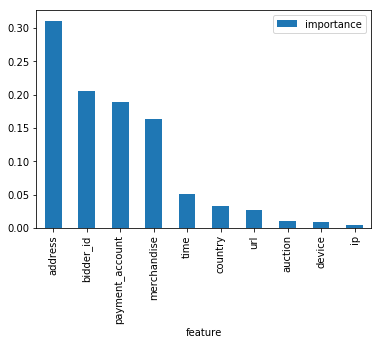

In [15]:
#https://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/

### Feature Importance
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=50,     #20
                              random_state=0)
forest.fit(X, y)

importances = pd.DataFrame({'feature':X.columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print importances
importances.plot.bar()



#feature_names = df.columns # e.g. ['A', 'B', 'C', 'D', 'E']
#plt.xticks(range(heart_train.shape[1]), feature_names)
#

#importances = forest.feature_importances_
#std = np.std([tree.feature_importances_ for tree in forest.estimators_],
#            axis=0)
#indices = np.argsort(importances)

## Plot the feature importances of the forest
#plt.figure()
#plt.title("Feature importances")
#plt.barh(range(X.shape[1]), importances[indices],
#       color="r", xerr=std[indices], align="center")
# If you want to define your own labels, change indices to a list of labels on the following line.
#plt.yticks(range(X.shape[1]), indices)
#plt.xticks(range(X.shape[1]), feature_cols)
#plt.ylim([-1, X.shape[1]])
#plt.show()

In [16]:
# preparando dataframe com as features mais importantes
X = X.drop(['country','url','auction','device','ip','time'], axis=1)

X.head()

,bidder_id,merchandise,payment_account,address
1,796,4,1497,438
5,1803,7,153,522
9,1295,9,649,1288
10,1295,9,649,1288
13,985,7,1811,1979


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

import xgboost as xgb
tuned_params = [{'objective': ['binary:logistic'], 'learning_rate': [0.01, 0.03, 0.05], 
                 'n_estimators': [100, 150, 200], 'max_depth':[4, 6, 8]}]
begin_t = time.time()
clf = GridSearchCV(xgb.XGBClassifier(seed=7), tuned_params, scoring='roc_auc')
clf.fit(X_train, y_train)
predictions = clf.predict_proba(X_test)[:, 1]
print 'current best parameters of xgboost: ',clf.best_params_

predic = pd.Series(predictions)
predic.head()

test = pd.read_csv('test.csv')
test['prediction'] = predic
test[['bidder_id', 'prediction']].to_csv('sub.csv', index=False)

ImportError: No module named xgboost

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.naive_bayes import GaussianNB

clf = GaussianNB(priors=[0.1, 0.9])
clf.fit(X_train, y_train)
predictions = clf.predict_proba(X_test)[:, 1]

predic = pd.Series(predictions)
predic.head()

test = pd.read_csv('test.csv')
test['prediction'] = predic
test[['bidder_id', 'prediction']].to_csv('sub.csv', index=False)


![Envio Kaggle](img/gnb-teste.PNG)